# Business Understanding

Penyakit jantung atau yang dikenal dengan penyakit kardiovaskular adalah salah satu penyakit yang menyebabkan kematian secara global, diperkirakan kematian dari penyakit ini mencapai 17,9 juta dalam tahun 2019. Sangat penting untuk mendeteksi penyakit seawal mungkin agar bisa dicegah seperti konseling beserta pemberian obat-obat bisa dimulai

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

#Data Understanding

Data yang digunakan Heart Disease Classification Dataset

link : https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset

Dataset ini memiliki 1319 baris data dengan 9 kolom

Fitur-fitur yang terdapat dalam dataset:
1. age : Umur dari pasien
2. gender : Jenis kelamin dari pasien
3. impulse : Sinyal listrik yang dihasilkan oleh jantung
4. preassurehigh : Tekanan maksimum saat jantung berkontraksi
5. preassurelow : Tekanan minimum saat jantung berkontraksi
6. glucose : Kadar gula darah
7. kcm : Tiga mineral elektrolit yang sangat penting bagi fungsi jantung (Kalium(k), Kalsium(c), dan Magnesium(m))
8. troponin : Protein yang dilepaskan ke darah saat otot jantung rusak
9. class : Target dari model


## Data Loading

In [2]:
# Menkonversi data .csv menjadi DataFrame Pandas
df = pd.read_csv('heart.csv')
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [3]:
# Mengubah nama kolom

df = df.rename(columns={'impluse': 'impulse', 'pressurehight':'preassurehigh', 'pressurelow': 'preassurelow'})

## Exploratory Data Analysis

In [4]:
# Mendapatkan kesimpulan dari DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impulse        1319 non-null   int64  
 3   preassurehigh  1319 non-null   int64  
 4   preassurelow   1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [5]:
# Mendapatkan parameter statistik deskriptif dari DataFrame
df.describe()

,age,gender,impulse,preassurehigh,preassurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
# Memperiksa data yang hilang dari DataFrame
df.isnull().sum()

,0
age,0
gender,0
impulse,0
preassurehigh,0
preassurelow,0
glucose,0
kcm,0
troponin,0
class,0


In [7]:
# Memperiksa data yang duplikat dari DataFrame
df.duplicated().sum()

np.int64(0)

In [8]:
# Memperiksa dimensi dari DataFrame
df.shape

(1319, 9)

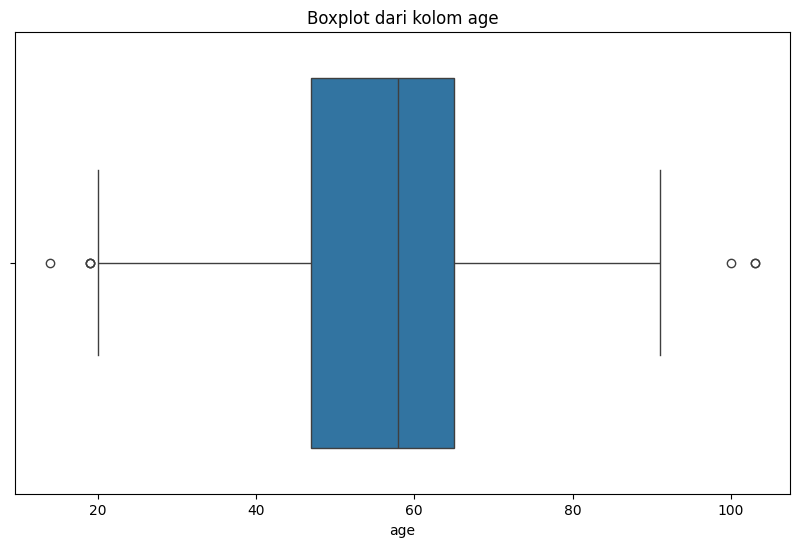

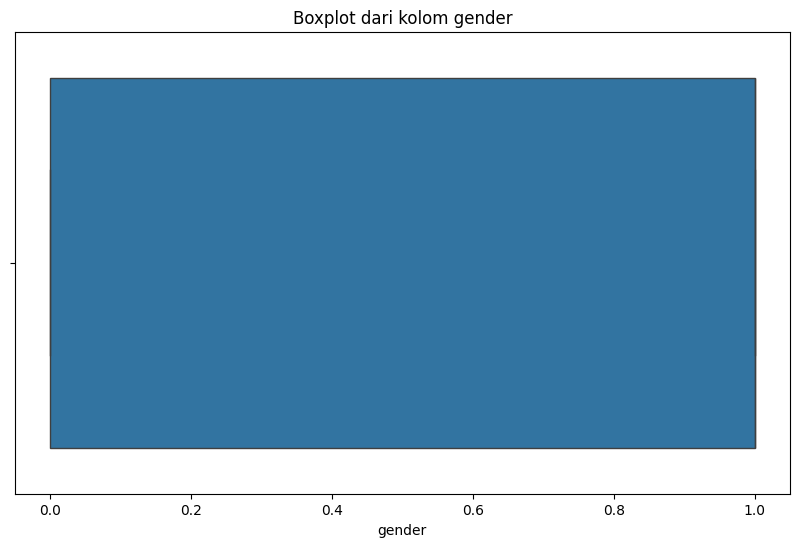

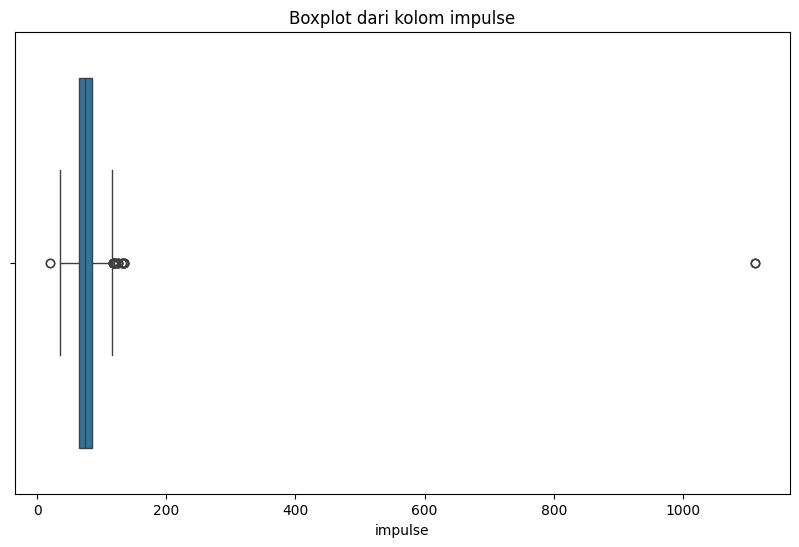

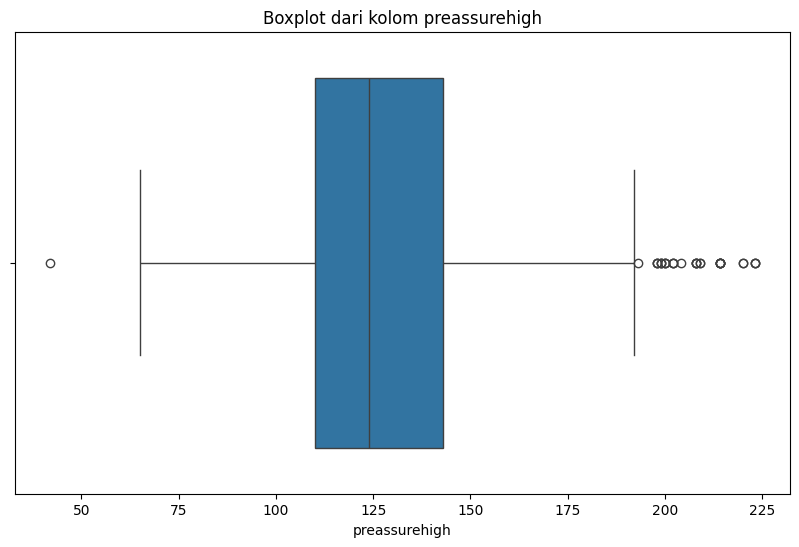

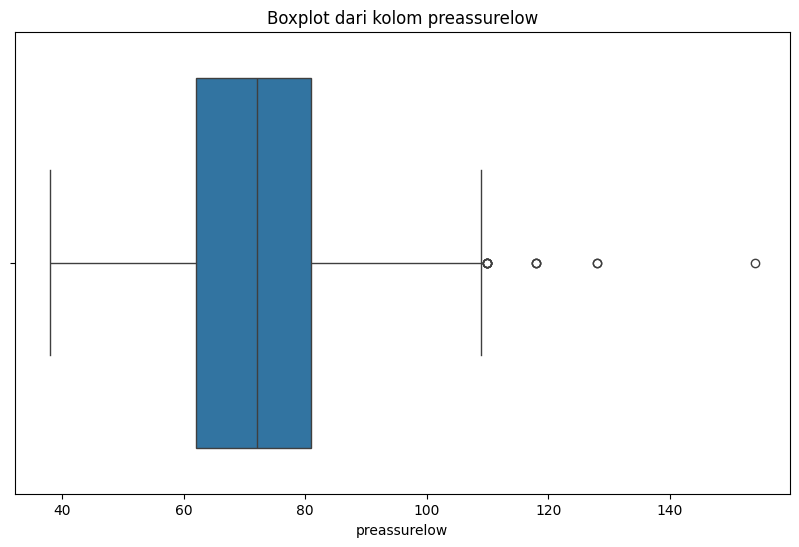

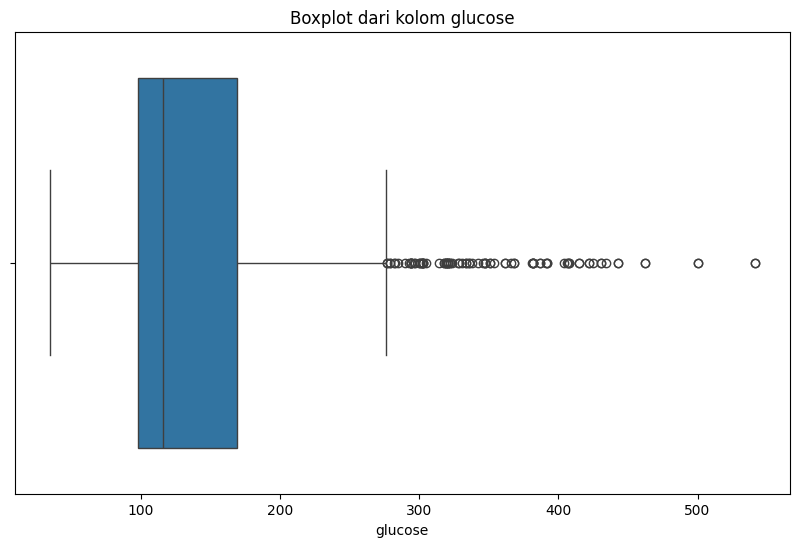

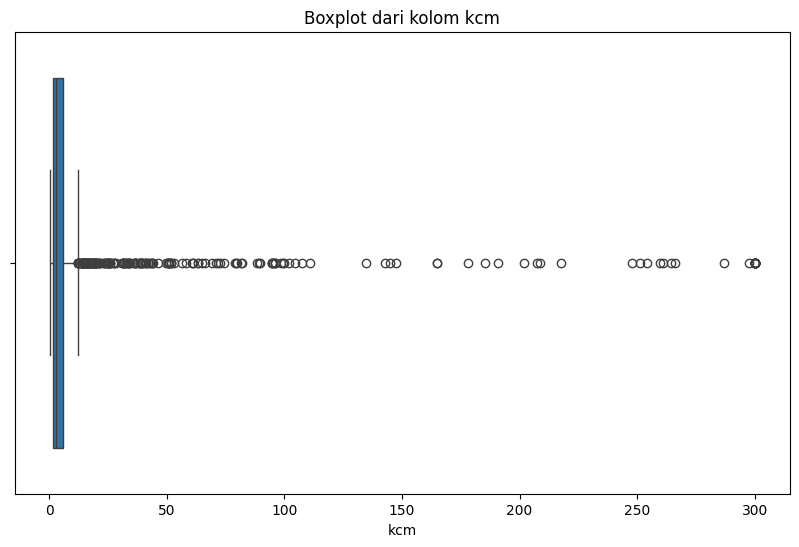

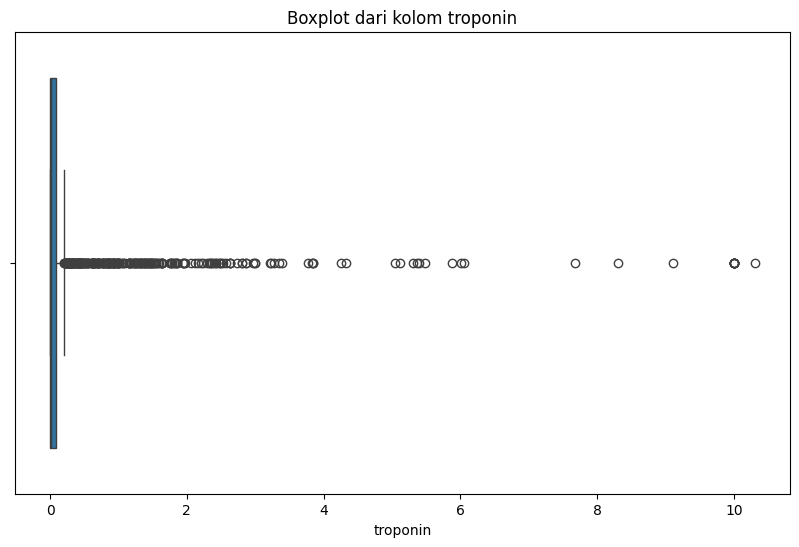

In [9]:
# Memperiksa Outliers dengan boxplot
numeric_features = df.select_dtypes(include=['number']).columns

for column in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot dari kolom {column}')
  plt.show()

In [10]:
# Menghilangkan outliers
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

filter_outliers = ~((df[numeric_features] < lower)| ( df[numeric_features] > upper)).any(axis=1)

clean_df = df[filter_outliers]

In [11]:
# Memperiksa dimensi DataFrame setelah dihilangkan outliers
clean_df.shape

(789, 9)

### Univariate Analysis

In [12]:
target = clean_df['class']

          jumlah_sampel  presentase
class                              
negative            444        56.3
positive            345        43.7




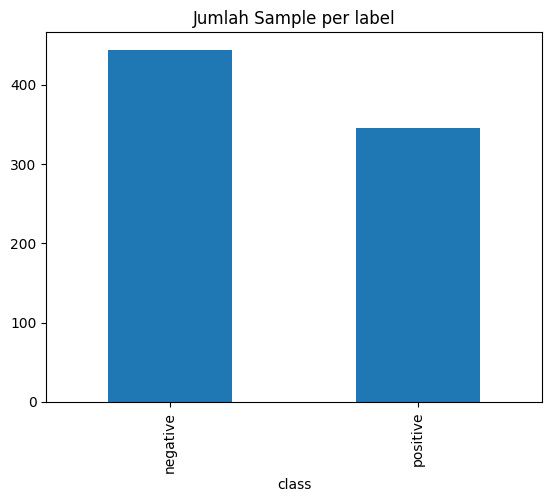

In [13]:
# Menampilkan presentase setiap label
count = target.value_counts()
percentage = 100*target.value_counts(normalize=True)
target_df = pd.DataFrame({'jumlah_sampel': count, 'presentase': percentage.round(1)})
print(target_df)
print('\n')

# Visualisasi Bar Plot
count.plot(kind='bar', title='Jumlah Sample per label')
plt.show()

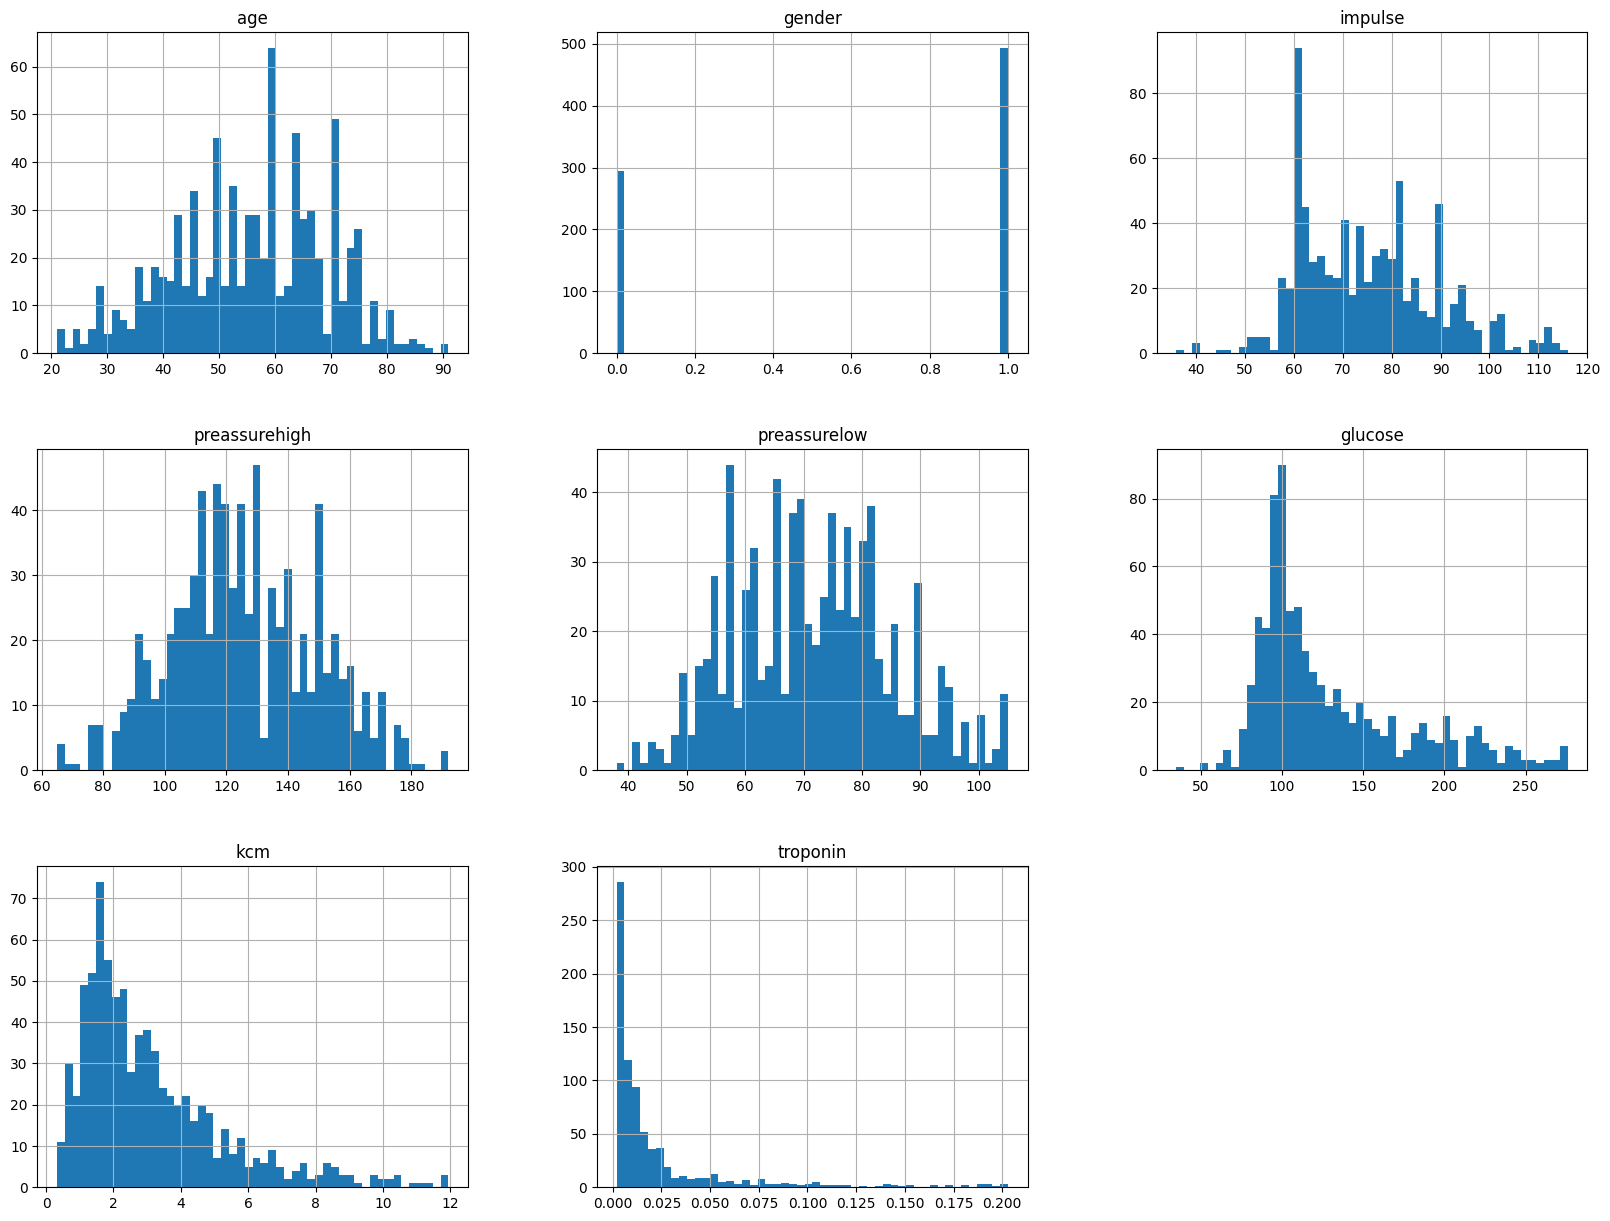

In [14]:
# Menampilkan histogram dari numerical features

clean_df.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

In [15]:
# Mengencode target agar bisa dianalisis lebih lanjut

encoded_target = clean_df.copy()

encoder = LabelEncoder()
encoded_target['class'] = encoder.fit_transform(encoded_target['class'])

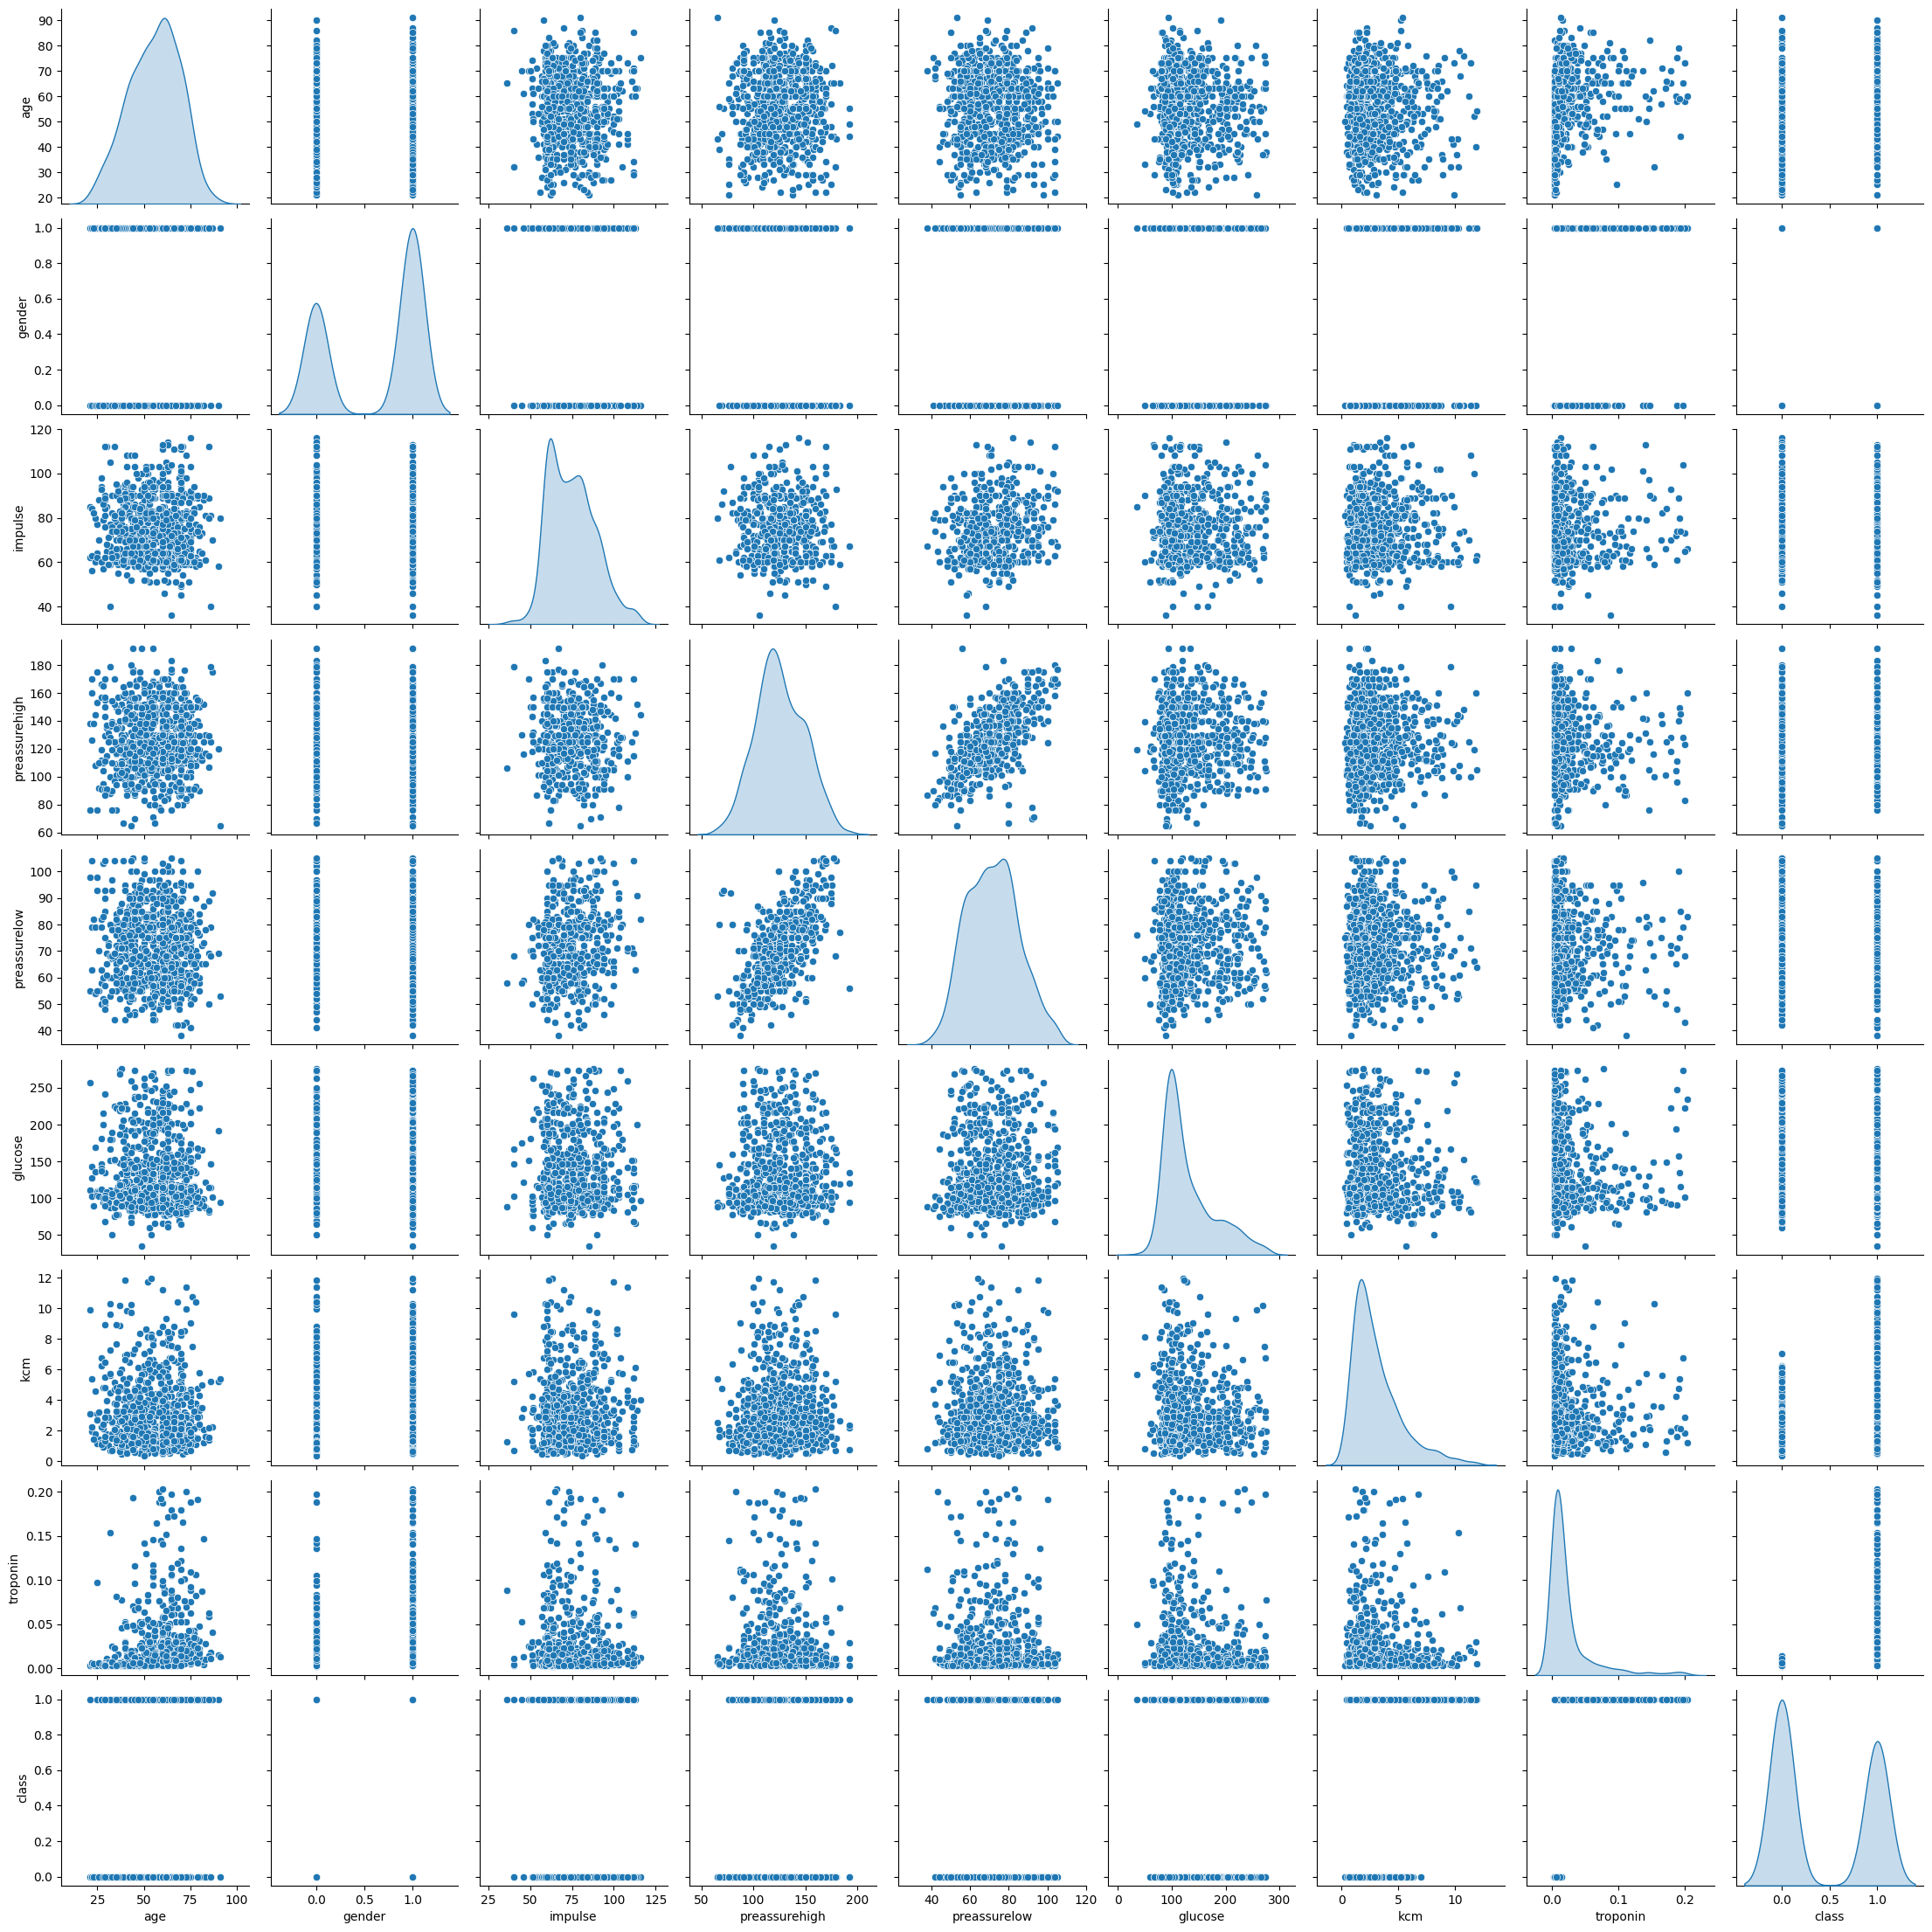

In [16]:
# Menampilkan pairplot dari Data Numerik
sns.pairplot(encoded_target, diag_kind='kde')
plt.show()

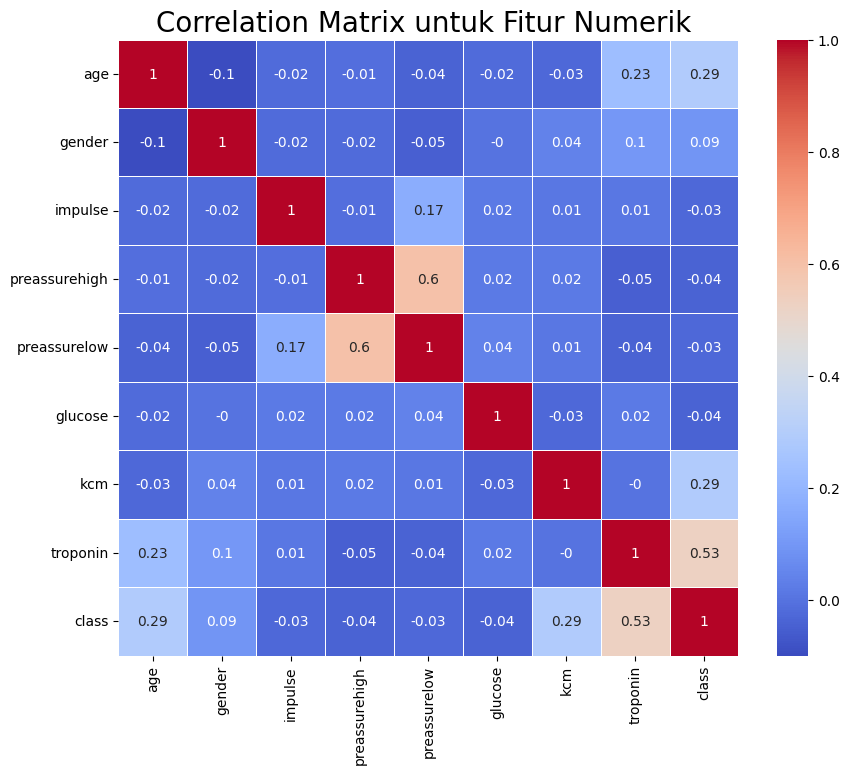

In [17]:
# Menampilkan heatmap

plt.figure(figsize=(10, 8))
correlation_matrix = encoded_target.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

# Data Preparation

In [18]:
# Data Splitting

X = encoded_target.drop('class', axis=1)
y = encoded_target['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Data Scaling

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

X_train

,age,gender,impulse,preassurehigh,preassurelow,glucose,kcm,troponin
332,1.384098,-1.306964,0.371404,-0.739399,0.517291,0.801715,-0.245216,-0.275275
216,0.802823,0.765132,-0.068977,-0.364785,-2.216963,-0.612779,0.259649,1.234417
1232,0.439526,0.765132,0.298008,0.550938,1.256279,0.527261,1.530990,1.150545
892,-0.214409,-1.306964,0.811785,1.633155,0.812886,-0.655003,-0.791388,-0.359147
87,-0.795684,0.765132,-0.068977,0.592561,0.960684,-0.950569,0.479953,-0.582805
...,...,...,...,...,...,...,...,...
118,0.294207,0.765132,-0.289167,-0.572904,-0.295595,-1.351694,1.443786,1.961305
173,-1.158980,-1.306964,0.004420,0.925551,0.073899,-0.274989,0.085241,-0.443018
449,-0.432387,0.765132,1.031976,1.508284,1.995267,-0.633891,-0.598621,-0.526890
722,-0.214409,-1.306964,1.545754,0.883928,0.886785,-0.823898,-0.846464,-0.107531


In [20]:
# Jumlah sampel dari data latih dan data uji

n_training = len(X_train)
n_test = len(X_test)

print(f'Jumlah sampel data latih: {n_training}')
print(f'Jumlah sampel data uji: {n_test}')

Jumlah sampel data latih: 631
Jumlah sampel data uji: 158


# Modelling

## K-Nearest Neighbors

In [21]:
# Inisialisasi Model KNN

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Random Forest Classifer

In [22]:
# Inisialisasi Model RF

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [23]:
# Scaling pada data uji
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Prediksi data uji
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [24]:
# Evaluasi dengan metriks

def evaluate(model: list, y_pred: list, name: list):
  """
  Mengevaluasi model

  model --> model yang telah dilatih, bisa lebih dari 1 atau 1 tetapi harus dalam list
  y_pred --> hasil prediksi model dari data uji
  name --> nama dari model yang ingin dievaluasi

  return DataFrame dari accuracy, precision, recall, f1-score, dan confusion matrix
  """

  data = {}

  for i in range(len(model)):
    accuracy = round(accuracy_score(y_test, y_pred[i]), 2)
    precision = round(precision_score(y_test, y_pred[i]), 2)
    recall = round(recall_score(y_test, y_pred[1]), 2)
    f1 = round(f1_score(y_test, y_pred[i]), 2)

    data[name[i]] = [accuracy, precision, recall, f1]

    cm = confusion_matrix(y_test, y_pred[i])

    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=0.2, xticklabels=['True', 'False'], yticklabels=['True', 'False'])
    plt.title(f'Confusion Matrix dari model {name[i]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

  print(pd.DataFrame(data, index=['Accuracy', 'Precision', 'Recall', 'F1']))

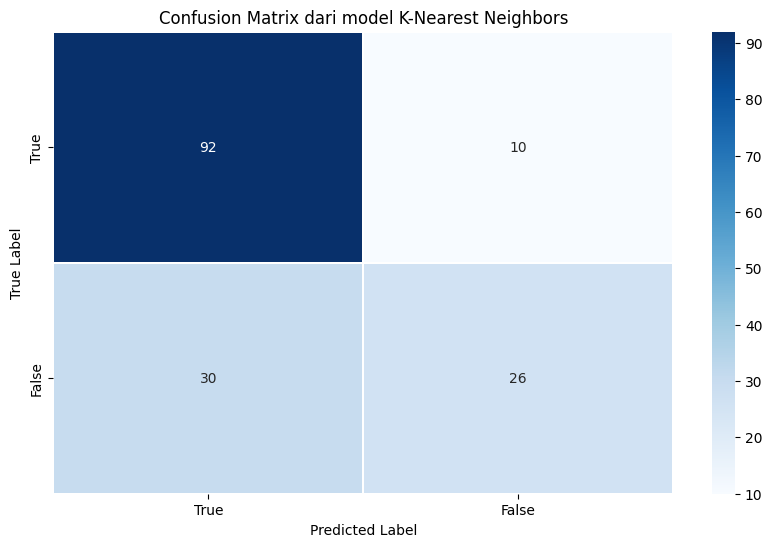

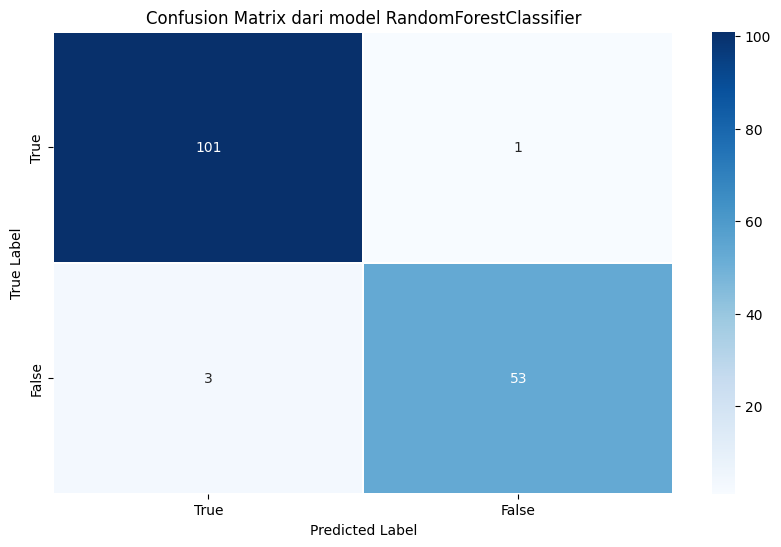

           K-Nearest Neighbors  RandomForestClassifier
Accuracy                  0.75                    0.97
Precision                 0.72                    0.98
Recall                    0.95                    0.95
F1                        0.57                    0.96


In [25]:
# Menjalankan Fungsi evaluate
evaluate([knn, rf], [y_pred_knn, y_pred_rf], ['K-Nearest Neighbors', 'RandomForestClassifier'])

Metrik yang saya gunakan untuk model klasifikasi ini adalah Accuracy, Precision, Recall, dan F1-Score

* **Accuracy** adalah Persentase prediksi benar (True Positive + True Negative) dibandingkan dengan seluruh prediksi.

* **Precision** adalah Dari semua prediksi positif, berapa banyak yang benar-benar positif.

* **Recall** adalah Dari semua kasus positif aktual, berapa banyak yang berhasil diprediksi.

* **F1-Score** adalah Rata-rata harmonik dari precision dan recall. Berguna ketika perlu menyeimbangkan keduanya.


Dari akurasi tersebut dapat saya simpulkan kalau model RandomForestClassifer adalah model yang tepat untuk mesalah berikut dikarenakan metriks yang dihasilkan hampir sempurna, sedangkan untuk

## Export Model

In [26]:
import joblib

joblib.dump(rf, 'rf_model.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']